<a href="https://colab.research.google.com/github/RafaelRamos19/Classificador-de-sentimento/blob/main/PNL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
resenha = pd.read_csv('imdb-reviews-pt-br.csv')
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


Observe que tem-se primeiro os textos com sentimentos negativos e depois com positivos no final
Vamos primeiro separar nossos dados para fazer uma primeira classificação



Vamos primero mudar as colunas, onde for neg vamos colocar 0 e pos será 1

In [ ]:
classificacao = resenha.sentiment.replace(['neg','pos'], [0,1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [ ]:
resenha['classificacao'] = classificacao
resenha.drop(['sentiment'], axis=1, inplace =True)
resenha

,id,text_en,text_pt,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,1


Vamos extrair de textos as palavras no intúito de classificar os textos

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo","Assisti um filme ruim"]
vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

Esse é o pequeno vocabulário que conseguimos obter com o texto 

In [ ]:
bag_of_words # ela é uma matriz 2x5 e vamos visualiza-la

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
matriz_espaca = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
matriz_espaca

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


Conseguimos fazer para aquelas palavras do texto, ou seja, transformamos linguagem natural para linguagem de máquina, nesse momento queremos fazer o mesmo para os nossos dados\



In [ ]:
vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 156923)


o vetor que possui o nosso vocabulário possui 156923 dimenssões, ou seja ele é extremamente grande, podemos diminuir isso tendo um vetor menor com as palavras que mais aparecem

In [ ]:
vetorizar = CountVectorizer(lowercase = False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


Agora vamos separar os dados de treino e de teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha.classificacao, random_state = 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


conseguimos uma acurácia que está maior que a média

Agora vamos escolher as palavras mais relevantes possíveis para que elas fiquem entre as 50 que estão sendo usadas

In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase = False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state = 42)

    regressao_logistica = LogisticRegression(solver = 'lbfgs')
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

print(classificar_texto(resenha, 'text_pt','classificacao'))

0.6583097452486858


Conseguimos o mesmo resultado, isso mostra que a função está funcionando perfeitamente


Agora vamos fazer uma wordcloud para saber quais são as palavras que mais aparecem no texto. A que mais aparecem estarão maiores do que as que aparecem pouco


In [ ]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [ ]:
%matplotlib inline
from wordcloud import WordCloud
texto_negativo = resenha.query('classificacao == 0')
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [ ]:
len(todas_palavras)

63448424

In [ ]:
nuven_palavras = WordCloud(width=800, height=500, max_font_size = 110, collocations=False).generate(todas_palavras)

In [ ]:
nuven_palavras

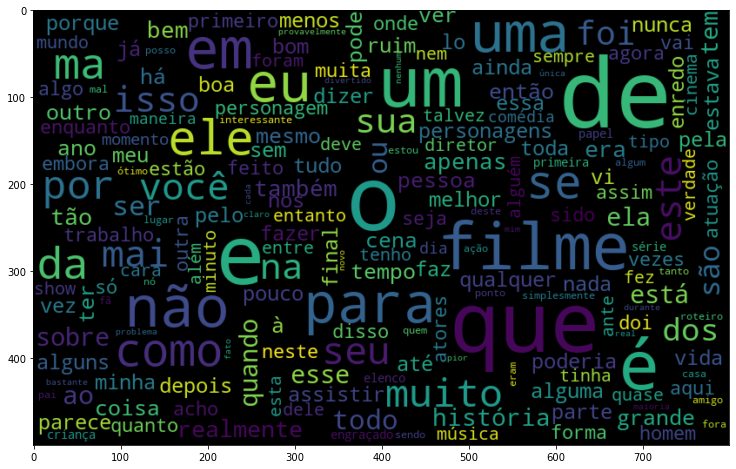

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.imshow(nuven_palavras, interpolation = 'bilinear')
plt.show()

Observe que as palavras que se destacam não parecem fazer efeito nas frases para determinar se ela é negativa ou positiva


Outra coisa é que todas as palavras sendo elas positivas ou negativas estão juntas, seria mais interessante deixa-las separadas

In [ ]:
resenha.query("classificacao ==1")

,id,text_en,text_pt,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,1
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,1


In [ ]:
def nuvem_de_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("classificacao ==0")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuven_palavras = WordCloud(width=800, height=500, max_font_size = 110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(16,8))
    plt.imshow(nuven_palavras, interpolation = 'bilinear')
    plt.show()
    

def nuvem_de_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("classificacao ==1")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuven_palavras = WordCloud(width=800, height=500, max_font_size = 110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(16,8))
    plt.imshow(nuven_palavras, interpolation = 'bilinear')
    plt.show()
    

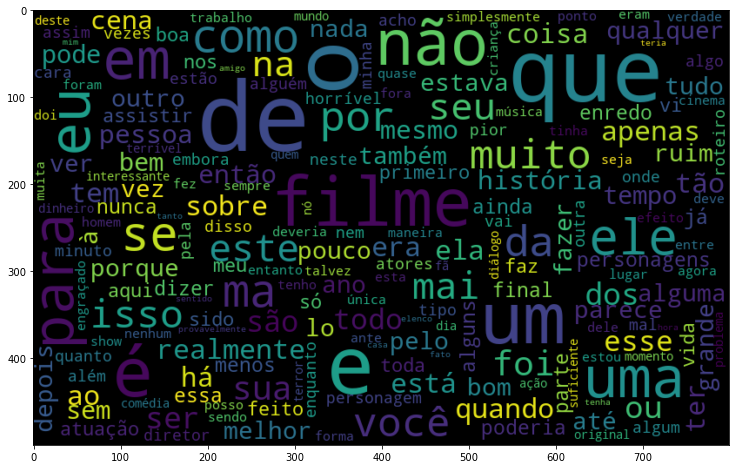

In [ ]:
nuvem_de_palavras_neg(resenha, "text_pt")

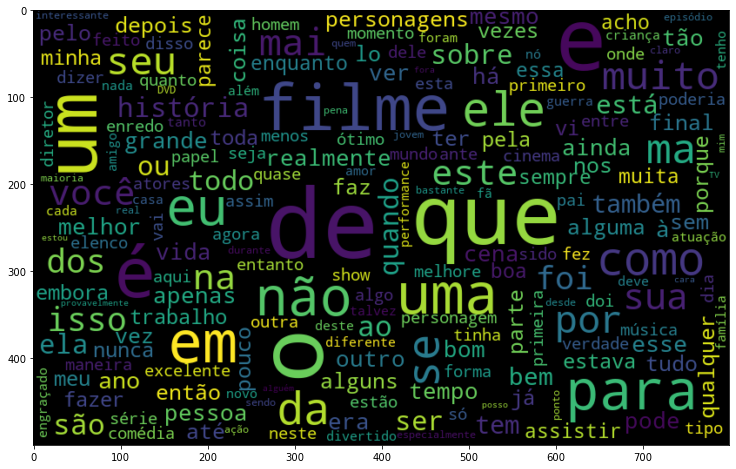

In [ ]:
nuvem_de_palavras_pos(resenha, "text_pt")

Agora vemos que possuem algumas diferenças entre os dois conjuntos, no entanto ainda existem palavras que não agregam nenhuma semâtica ao nosso modelo, deixando-o com uma acurácia mais baixa

In [ ]:
import nltk
#nltk.download('all')

In [ ]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras) 

In [ ]:

frequencia = nltk.FreqDist(token_frase)

In [ ]:
df_frequencia = pd.DataFrame({'palavra':list(frequencia.keys()), 'frequencia': list(frequencia.values())})

In [ ]:
df_frequencia.head()

,palavra,frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [ ]:
a = df_frequencia.nlargest(columns='frequencia', n = 10) #as 10 palavras com maiores frequência
a

,palavra,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


Observe que as palavras que mais aparecem não são decisivas par classificar o tipo de texto

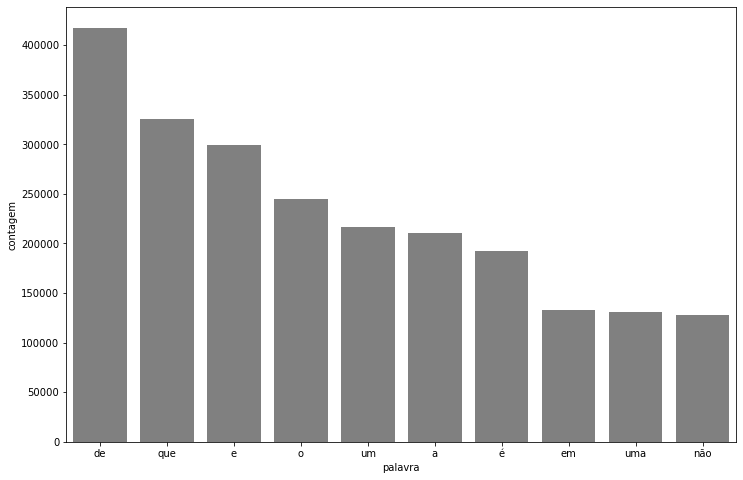

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = a, x='palavra', y='frequencia', color='gray')
ax.set(ylabel = 'contagem')
plt.show()

Criando uma função para essas visualizações

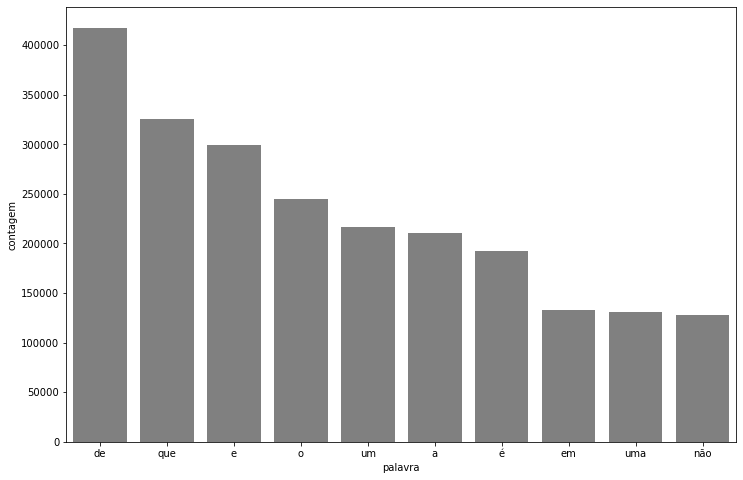

In [ ]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras) 
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({'palavra':list(frequencia.keys()), 'frequencia': list(frequencia.values())})
    a = df_frequencia.nlargest(columns='frequencia', n =quantidade ) 

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = a, x='palavra', y='frequencia', color='gray')
    ax.set(ylabel = 'contagem')
    plt.show()
    
pareto(resenha, 'text_pt', 10)

Precisamos deixar as palavras que agregam valor semântico em evidência
aquelas que não possuem valor semântico são chamadas de stop words e é possível remove-las com a biblioeteca nltk

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

Essas são as palavras irrelevantes
precisamos ir no dataframe e em cada frase retira-las

In [ ]:
frase_processada = []
for opniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opniao) # separamos nossa frase palavra por palavra
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
# criando uma nova coluna no dataframe com a palavra processada
resenha['tratamento1'] = frase_processada
    

In [ ]:
resenha

,id,text_en,text_pt,classificacao,tratamento1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",1,"Como média votos baixa, fato funcionário locad..."
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,1,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,1,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,1,A Christmas Together realmente veio antes temp...


Observe que as frases estão estranhas pois não existe mais stopwords

In [ ]:
classificar_texto(resenha, 'tratamento1','classificacao')

0.6811160533764659

Nós conseguimos melhorar nosso resultado, no entanto não foi uma melhora tão significativa

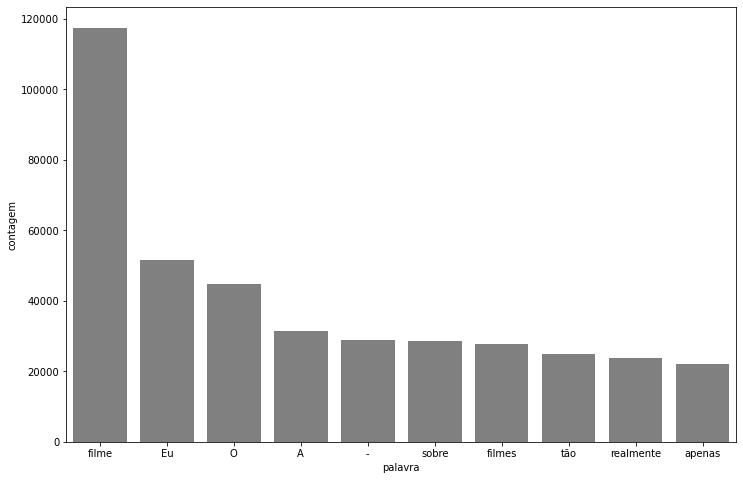

In [ ]:
pareto(resenha, 'tratamento1', 10)

Vamos melhorar ainda mais nosso modelo retirando as potuações

In [ ]:
from nltk import tokenize
from string import punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

É essa pontuação que queremos retirar dos nossos textos

In [ ]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
#criamos uma lista com as potuações    
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
token_pontuacao = tokenize.WordPunctTokenizer()
potuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = []
for opniao in resenha.tratamento1:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in potuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento2'] = frase_processada
resenha

,id,text_en,text_pt,classificacao,tratamento1,tratamento2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...
...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


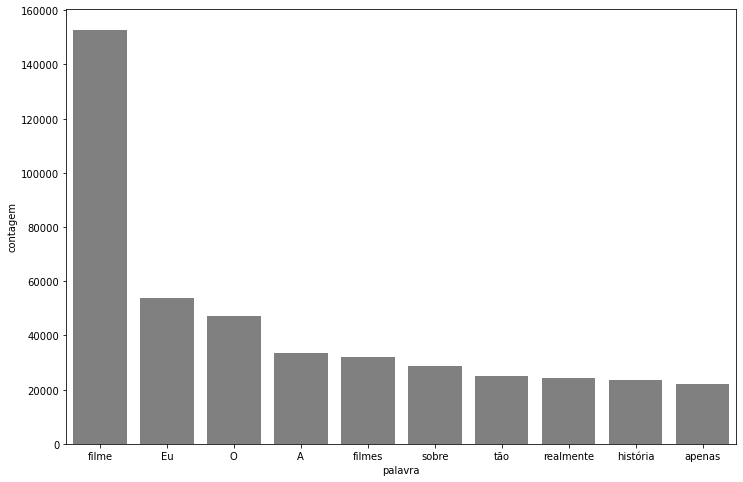

In [ ]:
pareto(resenha, 'tratamento2', 10)

In [ ]:
import unidecode
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento2']]

In [ ]:
sem_acentos[0] #não temos mais palavras acentuadas

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

Vamos retirar os acentos dos stop words

In [ ]:
stopwords_sem_acento =  [unidecode.unidecode(texto) for texto in potuacao_stopwords] 

In [ ]:
resenha['tratamento3'] = sem_acentos

frase_processada = []
for opniao in resenha.tratamento3:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in potuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento3'] = frase_processada
resenha

,id,text_en,text_pt,classificacao,tratamento1,tratamento2,tratamento3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...
...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...,Como media votos baixa fato funcionario locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros med...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


O tratamento três foi feito para adicionar palavras sem acentos e sem stopwords


Agora vamos ver se o resultado está melhor

In [ ]:
acuracia_treinamento3 = classificar_texto(resenha, 'tratamento3', 'classificacao')
acuracia_treinamento3

0.6887990295188031

Conseguimos melhorar algumas coisas porém nem tanto, vamos colocar nossa nuvem de palavras para ver o que se pode melhorar

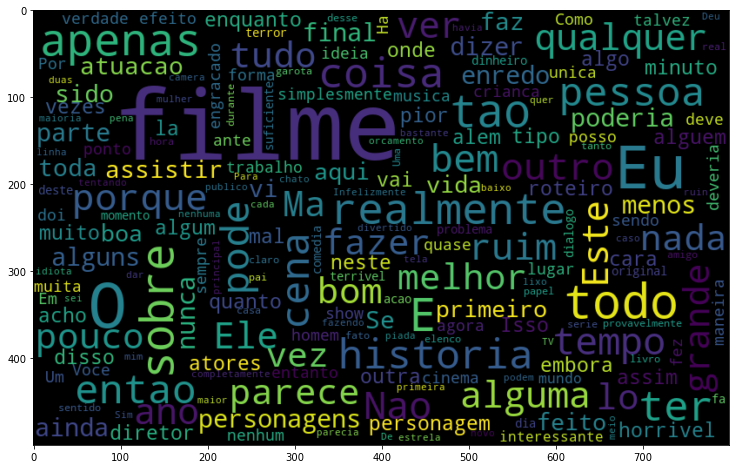

In [ ]:
nuvem_de_palavras_neg(resenha, 'tratamento3')

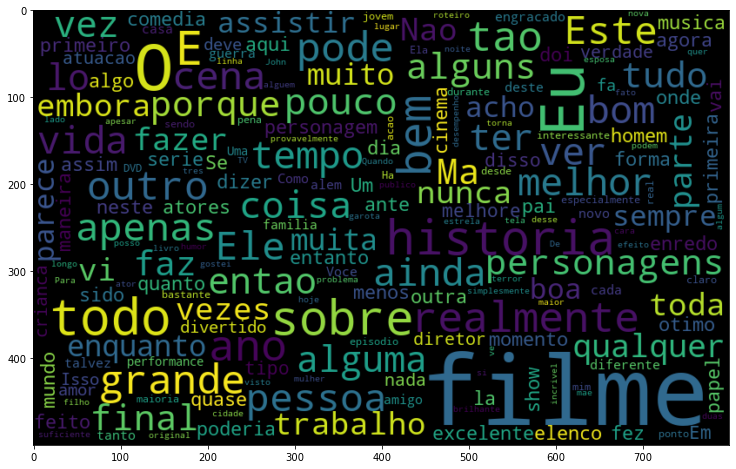

In [ ]:
nuvem_de_palavras_pos(resenha, 'tratamento3')

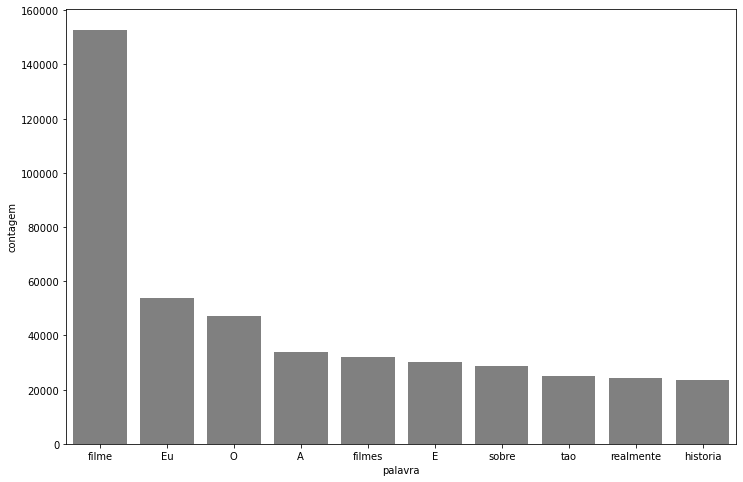

In [ ]:
pareto(resenha, 'tratamento3',10)

existem ainda muitos artigos, palavras como "eu" são stopwords também porém não foi removido pois estão em letras maiúsculas, vamos deixar todas em minúsculo

In [ ]:
frase_processada = []
for opniao in resenha.tratamento3:
    nova_frase = list()
    opniao = opniao.lower()
    palavras_texto = token_pontuacao.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento4'] = frase_processada
resenha

,id,text_en,text_pt,classificacao,tratamento1,tratamento2,tratamento3,tratamento4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...
...,...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...,Como media votos baixa fato funcionario locado...,media votos baixa fato funcionario locadora ac...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,enredo algumas reviravoltas infelizes inacredi...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros med...,espantado forma filme maioria outros media 5 e...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,christmas together realmente veio antes tempo ...


In [ ]:
acuracia_treinamento4 = classificar_texto(resenha, 'tratamento4', 'classificacao')
acuracia_treinamento4

0.6874241811564901

Observe que nossa acurácia está aumentando aos poucos, cada vez que vamos mudando algo vamos melhorando-a
vamos ver novamente as nuvens de palavras e o pareto para ver qual próximo tratamento podemos fazer

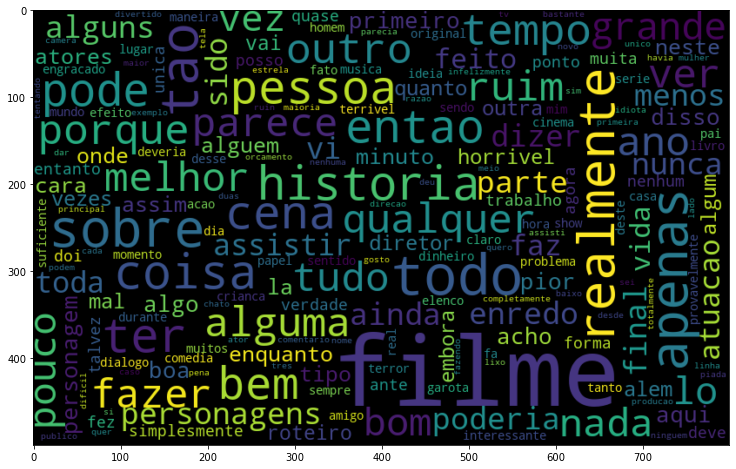

In [ ]:
nuvem_de_palavras_neg(resenha,'tratamento4')

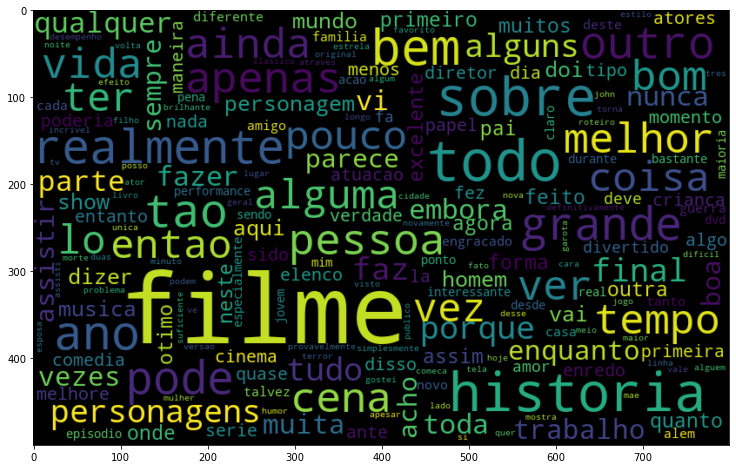

In [ ]:
nuvem_de_palavras_pos(resenha,'tratamento4')

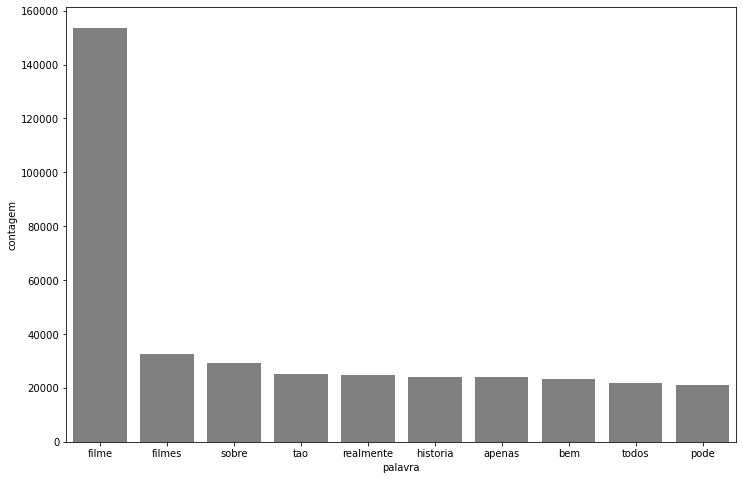

In [ ]:
pareto(resenha, 'tratamento4',10)

Stemmer: uma prática na liguagem natural na qual reduz as palavras a um radical comum, ou seja precisamos remover o sufixo de algumas palavras com radicais comuns

In [ ]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('corredor')

'corr'

In [ ]:
frase_processada = []
for opniao in resenha.tratamento4:
    nova_frase = list()
    opniao = opniao.lower()
    palavras_texto = token_pontuacao.tokenize(opniao)
    for palavra in palavras_texto:
        #if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento5'] = frase_processada
resenha

,id,text_en,text_pt,classificacao,tratamento1,tratamento2,tratamento3,tratamento4,tratamento5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...
...,...,...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...,Como media votos baixa fato funcionario locado...,media votos baixa fato funcionario locadora ac...,"med vot baix fat funcionari loc ach tud bem "",..."
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,enredo algumas reviravoltas infelizes inacredi...,enred algum reviravolt infeliz inacredita enta...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros med...,espantado forma filme maioria outros media 5 e...,espant form film maior outr med 5 estrel men f...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,christmas together realmente veio antes tempo ...,christm togeth real vei ant temp cri john denv...


In [ ]:
def comparacao_de_tratementos(tratamento_atual, tratemento_anterior):
    print('Comparação entre a acurácia do tratamento anterior com o atual: \n')
    print('Acurácia anterior: ',classificar_texto(resenha,tratemento_anterior, 'classificacao'))
    print('Acurácia atual:',classificar_texto(resenha,tratamento_atual, 'classificacao'))

In [ ]:
comparacao_de_tratementos('tratamento5','tratamento4')

Comparação entre a acurácia do tratamento anterior com o atual: 

Acurácia anterior:  0.6874241811564901
Acurácia atual: 0.6954306510311363


conseguimos aumentar ainda mais a nossa classificação aos poucos

vamos ver nossos gráficos para ter uma noção de onde podemos melhorar

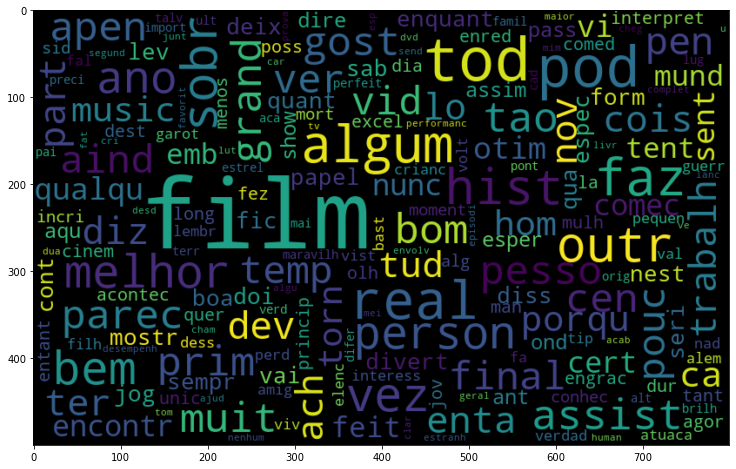

In [ ]:
nuvem_de_palavras_pos(resenha, 'tratamento5')

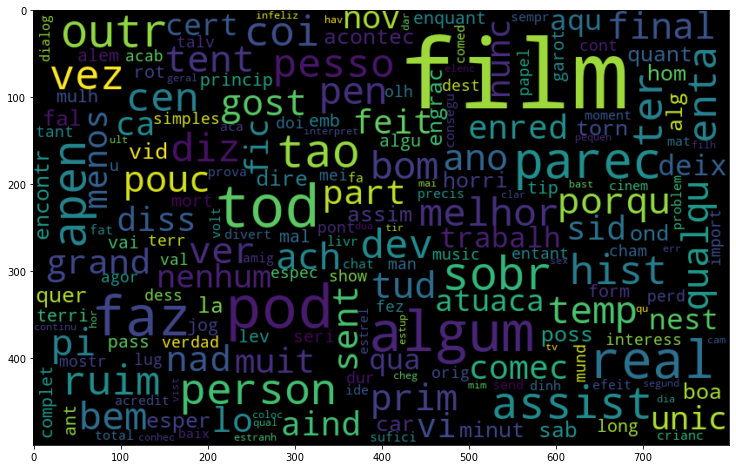

In [ ]:
nuvem_de_palavras_neg(resenha,'tratamento5')

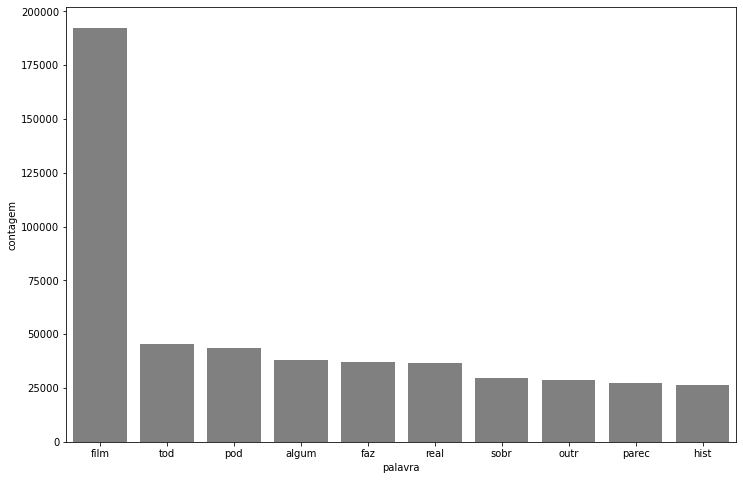

In [ ]:
pareto(resenha, 'tratamento5',10)

TF-IDF: colocar peso nas palavras, tipo  a palavra 'filme' está presente nos dois tipos de texto, porém a palavra 'horrivel' não está presente nos dois, logo para textos considerados negativos as palavras como 'horrivel' terão mais peso em relação a palavras que não acrescentam muito sentido semântico

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_atual = tfidf.fit_transform(resenha['tratamento5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_atual, resenha['classificacao'],random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_atual = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_atual)

0.6963202587949858


In [ ]:
from nltk import ngrams